# Machine Learning Project Code

#### Import useful packages

In [2]:
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#### Read in and clean data

In [35]:
df = pd.read_csv('C:\\Users\\johnb\\OneDrive\\Documents\\MSA\\Fall 3\\Machine Learning\\MLProjectData.csv')

In [36]:
df.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,target
0,1424.241,15.70,-1.930008,-0.005399,-0.014426,-0.017944,0.011322,15.22,13.77,13.96,...,False,True,False,False,False,False,False,False,False,21.639999
1,983.787,15.59,0.190003,-0.000129,0.002850,0.017414,0.033371,15.15,15.54,16.64,...,False,False,False,False,False,False,False,False,False,19.919998
2,105.075,16.32,0.809998,0.000752,0.004340,0.025135,0.007954,16.23,16.71,17.44,...,False,False,False,False,False,False,False,False,False,21.150001
3,356.126,28.29,-1.409996,-0.011557,-0.020185,0.003352,-0.047518,26.66,26.24,28.18,...,False,False,False,False,False,False,False,False,False,19.360001
4,772.041,11.49,0.079987,0.001576,0.000724,0.025519,0.033136,11.76,11.97,10.74,...,False,False,False,False,False,False,False,False,False,21.400009


In [37]:
# See if any of the category have more than two levels
for col in df.columns:
    if col[0:3] == 'cat':
        print(df[col].value_counts())

B    1303
C    1303
D    1279
E    1271
A    1194
Name: cat1, dtype: int64
F    557
H    554
E    550
J    550
C    547
L    529
G    529
D    527
K    510
A    509
I    508
B    480
Name: cat2, dtype: int64
False    6131
True      219
Name: cat3, dtype: int64
False    6070
True      280
Name: cat4, dtype: int64
False    6099
True      251
Name: cat5, dtype: int64
False    6156
True      194
Name: cat6, dtype: int64
False    6192
True      158
Name: cat7, dtype: int64
False    6281
True       69
Name: cat8, dtype: int64
False    6322
True       28
Name: cat9, dtype: int64
False    6306
True       44
Name: cat10, dtype: int64
False    6131
True      219
Name: cat11, dtype: int64
False    6070
True      280
Name: cat12, dtype: int64
False    6099
True      251
Name: cat13, dtype: int64
False    6156
True      194
Name: cat14, dtype: int64
False    6306
True       44
Name: cat15, dtype: int64
False    6322
True       28
Name: cat16, dtype: int64
False    6192
True      158
Name: cat17, dt

In [38]:
# Create dummies for cat1 variable
dummies1 = pd.get_dummies(df['cat1'], prefix='cat1')
dummies1.head()

,cat1_A,cat1_B,cat1_C,cat1_D,cat1_E
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,0,1


In [39]:
# Create dummies for cat2 variable
dummies2 = pd.get_dummies(df['cat2'], prefix='cat2')
dummies2.head()

,cat2_A,cat2_B,cat2_C,cat2_D,cat2_E,cat2_F,cat2_G,cat2_H,cat2_I,cat2_J,cat2_K,cat2_L
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0


In [40]:
# Join the data with the dummies and drop the original columns
df_final = df.join(dummies1).join(dummies2)
df_final.drop(['cat1','cat2'], axis=1, inplace=True)

In [41]:
df_final.describe()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat2_C,cat2_D,cat2_E,cat2_F,cat2_G,cat2_H,cat2_I,cat2_J,cat2_K,cat2_L
count,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,...,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000,6350.000000
mean,849.859489,19.424687,0.035514,0.000350,0.000692,0.002359,0.004674,19.423997,19.423383,19.422728,...,0.086142,0.082992,0.086614,0.087717,0.083307,0.087244,0.080000,0.086614,0.080315,0.083307
std,1000.217417,8.141230,1.378046,0.011589,0.015842,0.026975,0.036410,8.141693,8.142129,8.142565,...,0.280595,0.275892,0.281291,0.282904,0.276368,0.282215,0.271315,0.281291,0.271802,0.276368
min,0.052000,9.140000,-15.120010,-0.098448,-0.133555,-0.237463,-0.270464,9.140000,9.140000,9.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.644250,13.420000,-0.529998,-0.004574,-0.006676,-0.010854,-0.012989,13.420000,13.420000,13.420000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.720000,17.540000,0.079990,0.000598,0.001327,0.004094,0.007847,17.540000,17.540000,17.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1250.553750,23.010000,0.639999,0.005726,0.008740,0.017024,0.025125,23.010000,23.010000,23.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8710.263000,80.860000,9.529999,0.145198,0.128249,0.173543,0.205891,80.860000,80.860000,80.860000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Create the variable and target subsets
var = df_final.drop('target',axis=1)
target = df_final['target']

#### Basic OLS Linear Model

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, train_test_split

In [9]:
# Performe a train-test split and calculate the baseline MAE
var_train, var_test, target_train, target_test = train_test_split(var, target, test_size=0.3, random_state=69)
baseline = [target_train.mean()] * len(target_test)
base_score = mean_absolute_error(target_test, baseline)
base_score

0.9602879158667785

In [14]:
# Initialize and fit the model
reg = linear_model.LinearRegression()
reg.fit(var_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
# R-squared
reg.score(var_test, target_test)

-0.0017441789738017466

In [16]:
# Predict on the test set
preds = reg.predict(var_test)
OLS_mae = mean_absolute_error(target_test, preds)
# Difference between baseline and OLS
base_score - OLS_mae

-0.006227093595627897

#### Reguarlized Regression (LASSO)

In [17]:
# Initialize and fit the model
lasso = linear_model.Lasso()
lasso.fit(var_train, target_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
# Get predictions and score
lasso_preds = lasso.predict(var_test)
lasso_mae = mean_absolute_error(target_test, lasso_preds)
base_score - lasso_mae

0.000613759129573177

#### Decision Trees

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
# Initialize and use cross-validation to score
tree = DecisionTreeRegressor()
cv = cross_validate(tree, var, target, scoring='neg_mean_absolute_error', return_train_score=True, cv=5)

In [20]:
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [21]:
cv['test_score']

array([-1.468004  , -1.41615268, -1.41121311, -1.46245574, -1.38853182])

In [22]:
cv['train_score']

array([-4.25590551e-07, -7.58038058e-07, -7.39304462e-07, -4.58825459e-07,
       -3.84383202e-07])

In [23]:
# Set up the parameters for grid search
tree_params = {'max_depth': [i+1 for i in range(10)], 'min_samples_split' :[2,5,10,20], 'min_samples_leaf':[1,2,5,8,10,20,30,40]}
grid = GridSearchCV(tree, param_grid=tree_params,scoring='neg_mean_absolute_error', cv=5)
grid.fit(var, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 5, 8, 10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [127]:
# Score off the best model
grid_df = pd.DataFrame(grid.cv_results_)
base_score - (-1 * grid_df['mean_test_score'].max())

C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\util

0.005318568231099108

In [128]:
grid_df[grid_df['mean_test_score']==grid_df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
46,0.09057,0.003052,0.007169,0.00074,2,8,10,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",-0.95312,-0.963466,...,-0.954969,0.013405,1,-0.950908,-0.948507,-0.956669,-0.947486,-0.950721,-0.950858,0.003184


#### Random Forests

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
# Set up and fit random forest
start = timeit.default_timer()
test_forest = RandomForestRegressor(n_estimators=500, n_jobs=6, random_state=69)
test_forest.fit(var_train, target_train)
stop = timeit.default_timer()

print('time: ',stop-start)

time:  62.301276814585435


In [92]:
# Get predictions and score
test_forest_preds = test_forest.predict(var_test)
test_forest_mae = mean_absolute_error(target_test, test_forest_preds)
base_score - test_forest_mae

-0.018224755261102565

In [69]:
# Also run with cross-validation
start = timeit.default_timer()
cv_forest = cross_validate(test_forest, var, target, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], return_train_score=True, cv=5)
stop = timeit.default_timer()

print('time: ',stop-start)

time:  369.8960190282014


In [77]:
print(cv_forest['train_neg_mean_absolute_error'])
print(cv_forest['train_neg_mean_squared_error'])

[-0.36292071 -0.36276081 -0.36489346 -0.36403172 -0.364787  ]
[-0.29044786 -0.29130447 -0.29886637 -0.29534025 -0.30701109]


In [78]:
print(cv_forest['test_neg_mean_absolute_error'])
print(cv_forest['test_neg_mean_squared_error'])

[-0.98300467 -0.98199264 -0.95950743 -0.99118755 -0.98190623]
[-2.18072445 -2.23154712 -1.9485578  -2.2361245  -1.95170937]


In [93]:
# Set up forest for grid search
forest = RandomForestRegressor(random_state=69)
forest_params = {'n_estimators':[10,100,1000], 'max_features':['auto','log2',10]}

In [97]:
forest_search = GridSearchCV(forest, param_grid=forest_params, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], cv=5, n_jobs=6, refit='neg_mean_absolute_error')

In [98]:
# Fit the model

### WARNING ###
## This takes like 15 minutes ##

start = timeit.default_timer()
forest_search.fit(var, target)
stop = timeit.default_timer()

print('time: ', stop-start)

time:  903.3776962496559


In [99]:
rand_df = pd.DataFrame(forest_search.cv_results_)

C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C

In [102]:
# Get the best score
base_score - (-1 * rand_df['mean_test_neg_mean_absolute_error'].max())

-0.009982061413150611

In [104]:
rand_df[rand_df['mean_test_neg_mean_absolute_error'] == rand_df['mean_test_neg_mean_absolute_error'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,...,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,split4_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error
5,53.939423,1.07597,5.885934,0.261703,log2,1000,"{'max_features': 'log2', 'n_estimators': 1000}",-0.980622,-0.967729,-0.952132,...,-2.067634,0.119914,1,-0.276363,-0.277391,-0.287194,-0.277478,-0.287935,-0.281272,0.005158


#### Feature Engineering with FeatureTools

In [18]:
import featuretools as ft

In [28]:
# Set up the entities
es = ft.EntitySet(id='data')
es = es.entity_from_dataframe(entity_id='data',
                             dataframe=var, 
                              index='index',
                             make_index=True)

In [111]:
es['data'].variables

[<Variable: index (dtype = index)>,
 <Variable: num1 (dtype = numeric)>,
 <Variable: num2 (dtype = numeric)>,
 <Variable: num3 (dtype = numeric)>,
 <Variable: num4 (dtype = numeric)>,
 <Variable: num5 (dtype = numeric)>,
 <Variable: num6 (dtype = numeric)>,
 <Variable: num7 (dtype = numeric)>,
 <Variable: num8 (dtype = numeric)>,
 <Variable: num9 (dtype = numeric)>,
 <Variable: num10 (dtype = numeric)>,
 <Variable: num11 (dtype = numeric)>,
 <Variable: num12 (dtype = numeric)>,
 <Variable: num13 (dtype = numeric)>,
 <Variable: num14 (dtype = numeric)>,
 <Variable: num15 (dtype = numeric)>,
 <Variable: num16 (dtype = numeric)>,
 <Variable: num17 (dtype = numeric)>,
 <Variable: num18 (dtype = numeric)>,
 <Variable: num19 (dtype = numeric)>,
 <Variable: num20 (dtype = numeric)>,
 <Variable: num21 (dtype = numeric)>,
 <Variable: num22 (dtype = numeric)>,
 <Variable: num23 (dtype = numeric)>,
 <Variable: num24 (dtype = numeric)>,
 <Variable: num25 (dtype = numeric)>,
 <Variable: num26 (dtyp

In [132]:
ft.list_primitives()

,name,type,description
0,num_true,aggregation,Finds the number of 'True' values in a boolean.
1,count,aggregation,Counts the number of non null values.
2,avg_time_between,aggregation,Computes the average time between consecutive ...
3,time_since_last,aggregation,Time since last related instance.
4,skew,aggregation,Computes the skewness of a data set.
5,mode,aggregation,Finds the most common element in a categorical...
6,mean,aggregation,Computes the average value of a numeric feature.
7,num_unique,aggregation,Returns the number of unique categorical varia...
8,max,aggregation,Finds the maximum non-null value of a numeric ...
9,trend,aggregation,Calculates the slope of the linear trend of va...


In [29]:
# Create the features using transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                     target_entity='data',
                                     trans_primitives=['multiply','add',
                                                      'subtract'],
                                     n_jobs=6,
                                     max_depth=1)

EntitySet scattered to workers in 7.236 seconds


tornado.application - ERROR - Exception in Future <Future cancelled> after timeout
Traceback (most recent call last):
  File "C:\Users\johnb\Anaconda3\lib\site-packages\tornado\gen.py", line 970, in error_callback
    future.result()
concurrent.futures._base.CancelledError
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:60886 remote=tcp://127.0.0.1:60819>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:60936 remote=tcp://127.0.0.1:60819>


In [47]:
len(feature_defs)

11500

In [48]:
feature_matrix.head()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,num22 - num50,num27 - num24,num29 - cat1_C,num21 - num16,cat2_L - num1,num12 - cat2_J,cat2_F - num8,cat1_C - cat2_D,num39 - num53,num6 - num8
index,,,,,,,,,,,,,,,,,,,,,
0,1424.241,15.70,-1.930008,-0.005399,-0.014426,-0.017944,0.011322,15.22,13.77,13.96,...,115.629465,-8.854600,58.836975,-1.249988,-1424.241,0.031537,-15.22,255,49.605040,-15.237944
1,983.787,15.59,0.190003,-0.000129,0.002850,0.017414,0.033371,15.15,15.54,16.64,...,-113.504117,-31.733729,61.478762,0.229997,-983.787,0.029043,-15.15,0,27.626613,-15.132586
2,105.075,16.32,0.809998,0.000752,0.004340,0.025135,0.007954,16.23,16.71,17.44,...,20.019640,-30.229271,48.888235,-0.610004,-105.075,0.005545,-16.23,0,17.826410,-16.204865
3,356.126,28.29,-1.409996,-0.011557,-0.020185,0.003352,-0.047518,26.66,26.24,28.18,...,57.637477,-38.815950,37.987422,-2.949999,-355.126,0.061140,-26.66,1,28.791835,-26.656648
4,772.041,11.49,0.079987,0.001576,0.000724,0.025519,0.033136,11.76,11.97,10.74,...,50.890634,-26.785792,77.661471,0.510003,-772.041,-0.022959,-11.76,0,29.890500,-11.734481


In [49]:
# Run a random forest with all the new features

### WARNING ###
## This also takes a while ##

start = timeit.default_timer()
eng_forest = RandomForestRegressor(n_estimators=1000, n_jobs=6, max_features='log2', random_state=69)
cv_eng_forest = cross_validate(eng_forest, feature_matrix, target, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], return_train_score=True, cv=5)
stop = timeit.default_timer()

print('time: ',stop-start)

time:  752.5145476308046


In [50]:
#Get the best scores
print(base_score)
print(cv_eng_forest['test_neg_mean_absolute_error'])
print(cv_eng_forest['test_neg_mean_squared_error'])

0.9602879158667785
[-0.98092445 -0.97044855 -0.95605318 -0.97716734 -0.96985617]
[-2.21397017 -2.14677232 -1.94055349 -2.17917173 -1.91123632]


#### XGBoost

In [19]:
import xgboost as xg

In [30]:
# Split the feature matrix into training and test
ft_train, ft_test, lab_train, lab_test = train_test_split(feature_matrix, target, test_size=0.3, random_state=69)

In [31]:
# Set up data in proper form for XGBoost
dtrain = xg.DMatrix(var_train, label=target_train)
dtest = xg.DMatrix(var_test, label=target_test)

fttrain = xg.DMatrix(ft_train, label=lab_train)
fttest = xg.DMatrix(ft_test, label=lab_test)

In [35]:
# Set up the parameters for XGBoost model
xg_param = {'max_depth':3,'nthread':6,'silent':1,'objective':'reg:linear'}
xg_param['eval_metric'] = 'mae'
evallist = [(dtrain, 'train'),(dtest, 'eval')]
ftevallist = [(fttrain, 'train'),(fttest,'eval')]

In [37]:
# Run model on original variables
num_round = 100
bst = xg.train(xg_param, dtrain, num_round, evallist, early_stopping_rounds=10)

[0]	train-mae:13.6986	eval-mae:13.5937
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 10 rounds.
[1]	train-mae:9.59086	eval-mae:9.4856
[2]	train-mae:6.71978	eval-mae:6.61379
[3]	train-mae:4.71698	eval-mae:4.61891
[4]	train-mae:3.33493	eval-mae:3.24593
[5]	train-mae:2.40733	eval-mae:2.34393
[6]	train-mae:1.8091	eval-mae:1.77012
[7]	train-mae:1.4373	eval-mae:1.42513
[8]	train-mae:1.21362	eval-mae:1.22362
[9]	train-mae:1.08034	eval-mae:1.10837
[10]	train-mae:1.00564	eval-mae:1.04084
[11]	train-mae:0.961942	eval-mae:1.00336
[12]	train-mae:0.936595	eval-mae:0.983398
[13]	train-mae:0.920036	eval-mae:0.976162
[14]	train-mae:0.910682	eval-mae:0.971434
[15]	train-mae:0.904132	eval-mae:0.969761
[16]	train-mae:0.898466	eval-mae:0.972156
[17]	train-mae:0.894102	eval-mae:0.969855
[18]	train-mae:0.892687	eval-mae:0.969927
[19]	train-mae:0.890171	eval-mae:0.970159
[20]	train-mae:0.888305	eval-mae:0.970488
[21]	train-ma

In [34]:
# Run model on all new variables
ftbst = xg.train(xg_param, fttrain, num_round, ftevallist, early_stopping_rounds=10)

[0]	train-mae:13.6989	eval-mae:13.5929
Multiple eval metrics have been passed: 'eval-mae' will be used for early stopping.

Will train until eval-mae hasn't improved in 10 rounds.
[1]	train-mae:9.59066	eval-mae:9.4833
[2]	train-mae:6.71582	eval-mae:6.61375
[3]	train-mae:4.71308	eval-mae:4.6175
[4]	train-mae:3.33203	eval-mae:3.2485
[5]	train-mae:2.40287	eval-mae:2.34645
[6]	train-mae:1.80759	eval-mae:1.77214
[7]	train-mae:1.43494	eval-mae:1.42519
[8]	train-mae:1.20912	eval-mae:1.22178
[9]	train-mae:1.07773	eval-mae:1.10076
[10]	train-mae:1.0039	eval-mae:1.03401
[11]	train-mae:0.962453	eval-mae:0.998721
[12]	train-mae:0.939167	eval-mae:0.980303
[13]	train-mae:0.926497	eval-mae:0.970994
[14]	train-mae:0.918274	eval-mae:0.968065
[15]	train-mae:0.911569	eval-mae:0.969079
[16]	train-mae:0.90788	eval-mae:0.968331
[17]	train-mae:0.904295	eval-mae:0.968882
[18]	train-mae:0.900551	eval-mae:0.968958
[19]	train-mae:0.89863	eval-mae:0.968938
[20]	train-mae:0.895318	eval-mae:0.969214
[21]	train-mae:

In [26]:
xg_preds = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

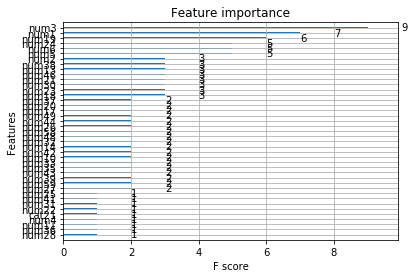

In [27]:
xg.plot_importance(bst);

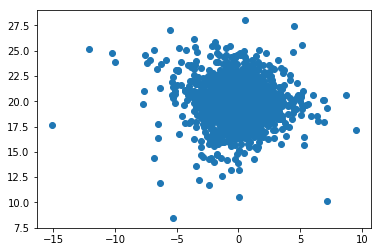

In [40]:
plt.scatter(var_train['num3'],target_train)

#### Principal Component Regression

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
# Grab just the numeric columns
nums = [col for col in df_final.columns if col[0:3] == 'num']
num_train = var_train[nums]
num_test = var_test[nums]

In [82]:
# Fit and transform the scaled numeric variables
pca = PCA(n_components=20).fit_transform(scale(num_train))

C:\Users\johnb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


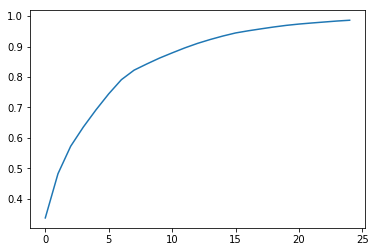

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [89]:
# Send the components through a linear model
pca_reg = linear_model.LinearRegression()
pca_score = cross_validate(pca_reg, pca, target_train, scoring=['neg_mean_absolute_error','neg_mean_squared_error'], return_train_score=True, cv=5)


In [90]:
print(pca_score['test_neg_mean_absolute_error'])
print(pca_score['test_neg_mean_squared_error'])

[-1.00581836 -0.97985907 -0.89378028 -0.93595191 -0.97842187]
[-2.42612447 -2.15790599 -1.67023449 -1.78273828 -2.01951272]


#### Regularized Regression with New Features

In [43]:
# Add squared numeric variables
for col in var.columns:
    if col[0:3] == 'num':
        var[col + '_squared'] = (var[col] ** 2)

In [44]:
numeric = []
cat = []
for col in var.columns:
    if col[0:3] == 'num':
        numeric.append(col)
        
for col in var.columns:
    if col[0:3] == 'cat':
        cat.append(col)
        
num_vars = var[numeric]

In [45]:
es_lasso = ft.EntitySet(id='data')
es_lasso = es_lasso.entity_from_dataframe(entity_id='data',
                             dataframe=num_vars, 
                              index='index',
                             make_index=True)

In [47]:
feature_matrix_lasso, feature_defs_lasso = ft.dfs(entityset=es_lasso,
                                     target_entity='data',
                                     trans_primitives=['multiply'],
                                     n_jobs=6,
                                     max_depth=1)

EntitySet scattered to workers in 6.462 seconds


tornado.application - ERROR - Exception in Future <Future cancelled> after timeout
Traceback (most recent call last):
  File "C:\Users\johnb\Anaconda3\lib\site-packages\tornado\gen.py", line 970, in error_callback
    future.result()
concurrent.futures._base.CancelledError


In [48]:
len(feature_defs_lasso)

7021

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lasso_nums = scaler.fit_transform(feature_matrix_lasso)

C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\johnb\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [54]:
lasso_nums

array([[ 0.57430188, -0.45754513, -1.42642275, ...,  0.1183184 ,
         2.48428501, -0.2616774 ],
       [ 0.13390894, -0.47105767,  0.11211609, ...,  0.4532585 ,
         0.32284431, -0.09643562],
       [-0.74468123, -0.38138356,  0.56206017, ...,  0.31453153,
        -0.64806729, -0.46110757],
       ...,
       [ 0.17049687, -0.33470389, -0.67892971, ..., -0.56402026,
        -0.1904534 ,  2.83987064],
       [-0.79592613, -0.53862035,  0.14433743, ...,  0.19951334,
        -0.65301772, -0.4615196 ],
       [ 1.75663394,  2.40711265,  0.67092429, ..., -0.18068722,
         0.06158605, -0.2666215 ]])

array([[ 0.57430188, -0.45754513, -1.42642275, ..., -0.18321983,
         0.17433701,  1.67855846],
       [ 0.13390894, -0.47105767,  0.11211609, ..., -0.19771363,
        -0.3025507 , -0.0431972 ],
       [-0.74468123, -0.38138356,  0.56206017, ..., -0.43168647,
        -0.32877641, -0.51846052],
       ...,
       [ 0.17049687, -0.33470389, -0.67892971, ...,  1.66265387,
        -0.23544807,  1.5543326 ],
       [-0.79592613, -0.53862035,  0.14433743, ..., -0.43647586,
        -0.26994034, -1.11805176],
       [ 1.75663394,  2.40711265,  0.67092429, ..., -0.26343793,
         0.71330336,  0.680163  ]])

In [ ]:
feature_train, feature_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=69)

In [ ]:
lasso_ft = linear_model.Lasso()
ridge_ft = linear_model.Ridge()